## Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%pwd
%cd drive/My Drive
%pwd

/content/drive/My Drive


'/content/drive/My Drive'

In [3]:
%ls -ltr

total 225
drwx------ 2 root root   4096 Nov 25 19:46 'Recipes - Annotated'/
drwx------ 2 root root   4096 Nov 27 03:48  Auto_annotated_recipes/
drwx------ 2 root root   4096 Nov 27 03:57  annotation_code/
drwx------ 2 root root   4096 Nov 29 23:10 'Colab Notebooks'/
drwx------ 2 root root   4096 Nov 30 02:39  NER_code/
drwx------ 2 root root   4096 Nov 30 05:40  Recipes_annotated_python/
drwx------ 2 root root   4096 Nov 30 23:21 'Final Recipes corpus'/
drwx------ 2 root root   4096 Dec  6 03:01  Recipes_annotated_java_1/
drwx------ 2 root root   4096 Dec  6 18:10 'Anyfile Notepad Files'/
drwx------ 2 root root   4096 Dec  6 19:24 'Recipes from allrecipes.com'/
-rw------- 1 root root  26489 Dec  9 06:03 'ELMO with LSTM (1).png'
drwx------ 2 root root   4096 Dec 10 17:18  shilsi_test/
drwx------ 2 root root   4096 Dec 17 20:00  final_recipe_corpus_annotated/
-rw------- 1 root root  26485 Dec 18 03:21 'ELMO with LSTM.png'
-rw------- 1 root root 122995 Dec 18 05:33  NER_with_ELMO.ipynb
dr

## Importing Libraries

In [4]:

import numpy as np
import pandas as pd
import os
import glob
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Using TensorFlow backend.


## File Directories

In [0]:
# Read the labeled conell files with the tag for an ingredient as B-OTH and prepare output sequence Y:
connll_directory  = '/content/drive/My Drive/ANLP-Final-Project-Submission/recipe_corpus_annotated_32/'
connll_directory1 = '/content/drive/My Drive/ANLP-Final-Project-Submission/recipe_corpus_annotated_123/'

## Funtion to find ingredients from annotated recipe and return array of ingredients

In [0]:
def ingredient_finder(text):
  content = open(text,'r')
  tagmaps = {}
  ing=[]
  try:
    for line in content:
        words = line.strip().split(" ")
        if(words[1] == "B-OTH" and words[0] not in tagmaps.keys()):
            tagmaps[words[0]] = words[1]
            ing.append(str(words[0]))

    ingredientlables.append(tagmaps)
  except: 
    print(text)
  return ing 

## Reading all files and putting the file names in a dataframe

In [0]:
os.chdir(connll_directory )
files_labeled = [f for f in os.listdir(connll_directory)]

In [8]:
food_df=pd.DataFrame(files_labeled)
food_df.columns = ['Recipe_file']
food_df['Recipe']=food_df['Recipe_file']
food_df['Recipe']=food_df['Recipe'].str.split('.',n=1,expand=True)

food_df

,Recipe_file,Recipe
0,asparagus-pistachio-soup.txt,asparagus-pistachio-soup
1,aubergine_puree.txt,aubergine_puree
2,clam_chowder.txt,clam_chowder
3,easy_pumpkin_soup.txt,easy_pumpkin_soup
4,beans_midly_spiced_and_stir-fried.txt,beans_midly_spiced_and_stir-fried
5,dolmeh.txt,dolmeh
6,easy_microwave_tomato.txt,easy_microwave_tomato
7,easy_grilled_leeks_with_grated_cheese.txt,easy_grilled_leeks_with_grated_cheese
8,basque-style_cream_mushroom_soup_saveur.txt,basque-style_cream_mushroom_soup_saveur
9,grilled_onions.txt,grilled_onions


In [9]:
ingredient_finder('clam_chowder.txt')

clam_chowder.txt


['potatoes',
 'potato',
 'floury',
 'boiled',
 'bacon',
 'pork',
 'onion',
 'thyme',
 'peppercorns',
 'paprika',
 'butter',
 'cornmeal',
 'corn',
 'notice',
 'nicer',
 'appearance',
 'leafless',
 'shells',
 'juices',
 'oils',
 'leaflets',
 'bread',
 'salad']

## Creating new column containing ingredients array with the created function

In [10]:
food_df['Ingredients'] = food_df['Recipe_file'].apply(lambda x: ingredient_finder(x))

asparagus-pistachio-soup.txt
aubergine_puree.txt
clam_chowder.txt
easy_pumpkin_soup.txt
beans_midly_spiced_and_stir-fried.txt
dolmeh.txt
easy_microwave_tomato.txt
easy_grilled_leeks_with_grated_cheese.txt
basque-style_cream_mushroom_soup_saveur.txt
grilled_onions.txt
kimchi.txt
healthy_asian_apple_soup.txt
hot_and_sour_shrimp_soup.txt
lettuce_soup.txt
hot_and_sour_cucumbers.txt
hoomos.txt
kapustniak.txt
latkes.txt
kapustnica_sour_cabbage_soup.txt
madjara.txt
mango.txt
oyster_stew.txt
reasted_red_onion_soup.txt
mechthilds_sweet_potatoes.txt
sopa_de_carbasso_bercelonia.txt
potato-turnip_balls.txt
monastery_style_bean_soup.txt
quick_and_dirty.txt
southwestern_onion_soup.txt
stuffed_aubergines.txt
stuffed_peppers_with_egg_and_cheese.txt
sweet_red_pepper_soup.txt


In [11]:
food_df

,Recipe_file,Recipe,Ingredients
0,asparagus-pistachio-soup.txt,asparagus-pistachio-soup,"[soup, salt, salted, pistachios, butter, salty..."
1,aubergine_puree.txt,aubergine_puree,"[aubergine, aubergines, peppers, tomatoes, clo..."
2,clam_chowder.txt,clam_chowder,"[potatoes, potato, floury, boiled, bacon, pork..."
3,easy_pumpkin_soup.txt,easy_pumpkin_soup,"[pumpkin, butternut]"
4,beans_midly_spiced_and_stir-fried.txt,beans_midly_spiced_and_stir-fried,"[beans, spiced, turmeric, powder, curry, leave..."
5,dolmeh.txt,dolmeh,"[leaf, leaves, rice, peas, sugar, sabzi, herbs..."
6,easy_microwave_tomato.txt,easy_microwave_tomato,[tomato]
7,easy_grilled_leeks_with_grated_cheese.txt,easy_grilled_leeks_with_grated_cheese,"[leeks, cheese, olive, boil]"
8,basque-style_cream_mushroom_soup_saveur.txt,basque-style_cream_mushroom_soup_saveur,"[creamy, mushroom, mushrooms, portobello, porc..."
9,grilled_onions.txt,grilled_onions,[lime]


## Reading files from another directory and following the same process as above

In [21]:
os.chdir(connll_directory1 )
files_labeled1 = [f for f in os.listdir(connll_directory1)]
food_df1=pd.DataFrame(files_labeled1)
food_df1.columns = ['Recipe_file']
food_df1['Recipe']=food_df1['Recipe_file']
food_df1['Recipe']=food_df1['Recipe'].str.split('.',n=1,expand=True)

food_df1

,Recipe_file,Recipe
0,Apple Crisp II.txt,Apple Crisp II
1,asparagus-pistachio-soup.txt,asparagus-pistachio-soup
2,aubergine_puree.txt,aubergine_puree
3,Apple Pie by Grandma Ople.txt,Apple Pie by Grandma Ople
4,Basic Mashed Potatoes.txt,Basic Mashed Potatoes
...,...,...
118,Spinach and Cheese Pie.txt,Spinach and Cheese Pie
119,The Best Rolled Sugar Cookies.txt,The Best Rolled Sugar Cookies
120,Yeast-Free Cinnamon Rolls.txt,Yeast-Free Cinnamon Rolls
121,Yummy Sweet Potato Casserole.txt,Yummy Sweet Potato Casserole


In [22]:
food_df1['Ingredients'] = food_df1['Recipe_file'].apply(lambda x: ingredient_finder(x))

Apple Crisp II.txt
asparagus-pistachio-soup.txt
aubergine_puree.txt
Apple Pie by Grandma Ople.txt
Basic Mashed Potatoes.txt
Awesome Sausage, Apple and Cranberry Stuffing.txt
Autumn Muffins.txt
Awesome and Easy Creamy Corn Casserole.txt
Banana Banana Bread.txt
Arizona Hatch Chili.txt
basque-style_cream_mushroom_soup_saveur.txt
Better-Than-Olive Garden® Alfredo Sauce .txt
Best Green Bean Casserole.txt
Beef Stew VI.txt
Best Potatoes You_ll Ever Taste.txt
beans_midly_spiced_and_stir-fried.txt
Best Big, Fat, Chewy Chocolate Chip Cookie.txt
Best Chocolate Chip Cookies.txt
Best Brownies.txt
Best Ever Slow Cooker Italian Beef Roast.txt
Boilermaker Tailgate Chili.txt
Caramel Apple Pork Chops.txt
Candied Yams.txt
Brussels Sprouts Gratin.txt
Chef John_s Pumpkin Pie.txt
Cheesy Broccoli-Stuffed Chicken Breasts.txt
Cheesy Sausage Lasagna Soup.txt
Cheddar Bay Biscuits.txt
Chef John_s Make-Ahead Turkey Gravy.txt
Butter Flaky Pie Crust.txt
Chef John_s Shepherd_s Pie.txt
Creamy Cornbread Casserole .txt


In [23]:
food_df1

,Recipe_file,Recipe,Ingredients
0,Apple Crisp II.txt,Apple Crisp II,"[apple, apples, sliced, sugar, flour, cinnamon..."
1,asparagus-pistachio-soup.txt,asparagus-pistachio-soup,"[asparaguspistachio, soup, salt, salted, pista..."
2,aubergine_puree.txt,aubergine_puree,"[aubergine, aubergines, peppers, tomatoes, clo..."
3,Apple Pie by Grandma Ople.txt,Apple Pie by Grandma Ople,"[apple, unsalted, butter, flour, water, sugar,..."
4,Basic Mashed Potatoes.txt,Basic Mashed Potatoes,"[potatoes, butter, milksalt, pepper, salted, w..."
...,...,...,...
118,Spinach and Cheese Pie.txt,Spinach and Cheese Pie,"[spinach, cheese, onion, mushrooms, sliced, ve..."
119,The Best Rolled Sugar Cookies.txt,The Best Rolled Sugar Cookies,"[sugar, butter, eggs, vanilla, flour, powder, ..."
120,Yeast-Free Cinnamon Rolls.txt,Yeast-Free Cinnamon Rolls,"[yeastfree, cinnamon, flour, sugar, powder, so..."
121,Yummy Sweet Potato Casserole.txt,Yummy Sweet Potato Casserole,"[potato, sugar, eggs, salt, butter, milk, vani..."


## Appending both dataframes 

In [0]:
food_df=food_df.append(food_df1)

In [25]:
food_df

,Recipe_file,Recipe,Ingredients
0,asparagus-pistachio-soup.txt,asparagus-pistachio-soup,"[soup, salt, salted, pistachios, butter, salty..."
1,aubergine_puree.txt,aubergine_puree,"[aubergine, aubergines, peppers, tomatoes, clo..."
2,clam_chowder.txt,clam_chowder,"[potatoes, potato, floury, boiled, bacon, pork..."
3,easy_pumpkin_soup.txt,easy_pumpkin_soup,"[pumpkin, butternut]"
4,beans_midly_spiced_and_stir-fried.txt,beans_midly_spiced_and_stir-fried,"[beans, spiced, turmeric, powder, curry, leave..."
...,...,...,...
118,Spinach and Cheese Pie.txt,Spinach and Cheese Pie,"[spinach, cheese, onion, mushrooms, sliced, ve..."
119,The Best Rolled Sugar Cookies.txt,The Best Rolled Sugar Cookies,"[sugar, butter, eggs, vanilla, flour, powder, ..."
120,Yeast-Free Cinnamon Rolls.txt,Yeast-Free Cinnamon Rolls,"[yeastfree, cinnamon, flour, sugar, powder, so..."
121,Yummy Sweet Potato Casserole.txt,Yummy Sweet Potato Casserole,"[potato, sugar, eggs, salt, butter, milk, vani..."


In [26]:
len(food_df)

155

## Creating train and test data

In [0]:
train_size = int(len(food_df) * .8)
train_posts = food_df['Ingredients']
train_tags = food_df['Recipe']
train_files_names = food_df['Recipe_file']
 
test_posts = food_df['Ingredients'][train_size:]
test_tags = food_df['Recipe'][train_size:]
test_files_names = food_df['Recipe_file'][train_size:]

In [28]:
len(train_tags)

155

In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_posts)
 
x_train = tokenizer.texts_to_matrix(train_posts, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test_posts, mode='tfidf')
 
encoder = LabelBinarizer()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

## Creating input and output shape for Neural-Network Model

In [30]:
vocab_size = x_train.shape[1]
print(vocab_size)

297


In [31]:
num_labels = y_train.shape[1]
num_labels

123

In [32]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((155, 297), (155, 123), (31, 297), (31, 123))

## Function to plot loss and accuracy

In [0]:
# Function to plot the statistics
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

## Model Architecture

In [34]:
model = Sequential()
model.add(Dense(512, input_shape=(vocab_size,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               152576    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 123)              

## Loss and optimiser for model

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Model Training

In [37]:
history = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 139 samples, validate on 16 samples
Epoch 1/30





139/139 [==============================] - 5s 33ms/step - loss: 4.9869 - acc: 0.0288 - val_loss: 4.9679 - val_acc: 0.0625
Epoch 2/30
139/139 [==============================] - 0s 381us/step - loss: 4.0368 - acc: 0.2734 - val_loss: 5.2343 - val_acc: 0.0625
Epoch 3/30
139/139 [==============================] - 0s 404us/step - loss: 3.1225 - acc: 0.5971 - val_loss: 5.8046 - val_acc: 0.0625
Epoch 4/30
139/139 [==============================] - 0s 361us/step - loss: 2.2722 - acc: 0.7770 - val_loss: 6.4055 - val_acc: 0.0625
Epoch 5/30
139/139 [==============================] - 0s 389us/step - loss: 1.3143 - acc: 0.9281 - val_loss: 6.8317 - val_acc: 0.0625
Epoch 6/30
139/139 [==============================] - 0s 351us/step - loss: 0.7514 - acc: 0.9640 - val_loss: 7.1806 - val_acc: 0.0625
Epoch 7/30
139/139 [==============================

## Loss,Accuracy plots

Training Accuracy: 0.9290
Testing Accuracy:  0.6452


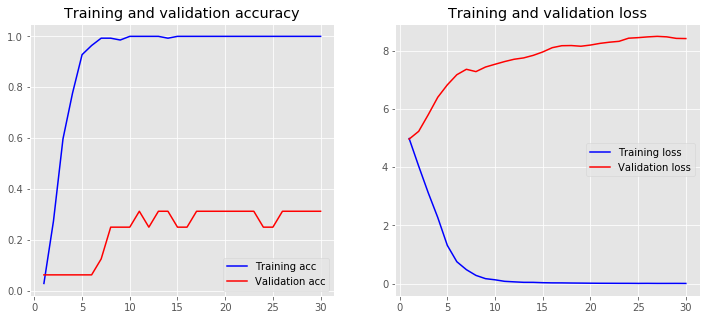

In [38]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

## Preparing data to test

In [0]:
text_labels = encoder.classes_

In [40]:
text_labels

array(['Apple Crisp II', 'Apple Pie by Grandma Ople',
       'Arizona Hatch Chili', 'Autumn Muffins',
       'Awesome Sausage, Apple and Cranberry Stuffing',
       'Awesome and Easy Creamy Corn Casserole', 'Banana Banana Bread',
       'Basic Mashed Potatoes', 'Beef Stew VI',
       'Best Big, Fat, Chewy Chocolate Chip Cookie', 'Best Brownies',
       'Best Chocolate Chip Cookies',
       'Best Ever Slow Cooker Italian Beef Roast',
       'Best Green Bean Casserole', 'Best Potatoes You_ll Ever Taste',
       'Better-Than-Olive Garden® Alfredo Sauce ',
       'Boilermaker Tailgate Chili', 'Brussels Sprouts Gratin',
       'Butter Flaky Pie Crust', 'Candied Yams',
       'Caramel Apple Pork Chops', 'Cheddar Bay Biscuits',
       'Cheesy Broccoli-Stuffed Chicken Breasts',
       'Cheesy Sausage Lasagna Soup',
       'Chef John_s Make-Ahead Turkey Gravy', 'Chef John_s Pumpkin Pie',
       'Chef John_s Shepherd_s Pie', 'Chile Verde Quiche',
       'Chocolate Eclair Cake', 'Chocolate Kahlua

## Dummy data arrays

In [0]:
a=['apples','bananas','eggs', 'tomato','lettuce', 'ham', 'creme', 'eggs', 'creamy', 'nicely']

In [0]:
b=['bean', 'chillies', 'choice', 'mint','tahiini', 'garbanzos', 'sesame']

## Function to predict recipe by taking ingredient as input

In [0]:
def recipe_suggestor(ingredients):
  n=len(ingredients)
  interim_results = tokenizer.texts_to_matrix(ingredients,mode='tfidf')
  prediction = model.predict(np.array(interim_results))
  pred_label=[]
  for i in range(n):
    predicted_label = text_labels[np.argmax(prediction[i])]
    pred_label.append(predicted_label)
  Result=set(pred_label)
  Result=list(Result)
  return Result  


## Results

In [44]:
recipe_suggestor(a)

['Awesome and Easy Creamy Corn Casserole',
 'healthy_asian_apple_soup',
 'lettuce_soup',
 'Janet_s Rich Banana Bread',
 'easy_microwave_tomato']

In [45]:
recipe_suggestor(b)

['hoomos', 'Slow Cooker Green Bean Casserole', 'monastery_style_bean_soup']